In [104]:
#   Model Evaluation and Refinement

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('automobileEDA.csv')

In [105]:
df.to_csv('module_5_auto.csv')

In [106]:
#   Let's use numeric data:

df = df._get_numeric_data()
df.head


<bound method NDFrame.head of      symboling  normalized-losses  wheel-base    length     width  height  \
0            3                122        88.6  0.811148  0.890278    48.8   
1            3                122        88.6  0.811148  0.890278    48.8   
2            1                122        94.5  0.822681  0.909722    52.4   
3            2                164        99.8  0.848630  0.919444    54.3   
4            2                164        99.4  0.848630  0.922222    54.3   
..         ...                ...         ...       ...       ...     ...   
196         -1                 95       109.1  0.907256  0.956944    55.5   
197         -1                 95       109.1  0.907256  0.955556    55.5   
198         -1                 95       109.1  0.907256  0.956944    55.5   
199         -1                 95       109.1  0.907256  0.956944    55.5   
200         -1                 95       109.1  0.907256  0.956944    55.5   

     curb-weight  engine-size  bore  stroke  

In [107]:
#   Libraries for plotting:

%%capture
! pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org ipywidgets

UsageError: Line magic function `%%capture` not found.


In [108]:
from ipywidgets import interact, interactive, fixed, interact_manual


In [109]:
#   Functions for plotting

def distribution_plot(red_function, blue_function, red_name, blue_name, title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(red_function, hist=False, color='r', label=red_name)
    ax2 = sns.distplot(blue_function, hist=False, color='b', label=blue_name, ax=ax1)

    plt.title(title)
    plt.xlabel('Price in $')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [110]:
def polly_plot(x_train, x_test, y_train, y_test, lr_obj, poly_transform_obj):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    x_max = max([x_train.values.max(), x_test.values.max()])
    x_min = min([x_train.values.min(), x_test.values.min()])
    x = np.arange(x_min, x_max, 0.1)

    plt.plot(x_train, y_train, 'ro', label='Training Data')
    plt.plot(x_test, y_test, 'go', label='Test Data')
    plt.plot(x, lr_obj.predict(poly_transform_obj.fit_transform(x.reshape(-1, 1))),
             label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [111]:
#   Split data into training and testing sets:

y_data = df['price']

In [112]:
#   Drop price data in df **x_data**:

x_data = df.drop('price', axis=1)

In [113]:
#   Splitting:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print('Number of test samples :', x_test.shape[0])
print('Number of training samples :', x_train.shape[0])

Number of test samples : 21
Number of training samples : 180


In [114]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print('Number of test samples :', x_test1.shape[0])
print('Number of training samples :', x_train1.shape[0])

Number of test samples : 81
Number of training samples : 120


In [115]:
#   Import LinearRegression:

from sklearn.linear_model import LinearRegression

In [116]:
#   Create lr object:

lr_obj = LinearRegression()

In [117]:
#   Fit the model using 'horsepower':

lr_obj.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [118]:
#   R^2 with test data:

lr_obj.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [119]:
#   R^2 with train data:

lr_obj.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [120]:
lr_obj.fit(x_train1[['horsepower']], y_train1)
lr_obj.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

In [121]:
#   If don't have sufficient testing data - use cross-validation:

from sklearn.model_selection import cross_val_score

In [122]:
R_cross = cross_val_score(lr_obj, x_data[['horsepower']], y_data, cv=4)
R_cross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [123]:
print('The means of the folds are', R_cross.mean(), '& the std dev is ', R_cross.std())

The means of the folds are 0.522009915042119 & the std dev is  0.291183944475603


In [124]:
#   We can use negative squared error as a score:

-1 * cross_val_score(lr_obj, x_data[['horsepower']], y_data, scoring='neg_mean_squared_error')

array([18982700.02615235, 57082774.35405646, 20393381.56613285,
        6877569.20187989, 20777198.94428747])

In [125]:
R_cross1 = cross_val_score(lr_obj, x_data[['horsepower']], y_data, cv=2)
R_cross1

array([0.59015621, 0.44319613])

In [126]:
R_cross1.mean()

0.5166761697127429

In [127]:
#   Predict with cross-validation:

from sklearn.model_selection import cross_val_predict

In [128]:
y_hat = cross_val_predict(lr_obj, x_data[['horsepower']], y_data, cv=4)
y_hat[:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [129]:
#   Underfitting, Overfitting and Model Selection:

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [130]:
y_hat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
y_hat_train[:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [131]:
y_hat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
y_hat_test[:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [132]:
#   Model evaluation with train and test separately:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/a19046897/PycharmProjects/Models study/venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/a19046897/PycharmProjects/Models study/venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


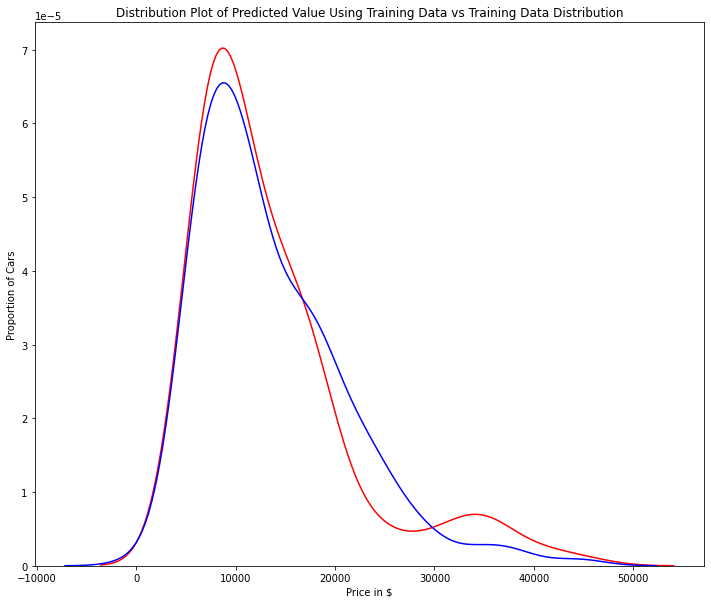

In [133]:
#   Distribution of predicted values of train data:

title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
distribution_plot(y_train, y_hat_train, 'Actual Values (Train)', 'Predicted Values (Train)', title)

/Users/a19046897/PycharmProjects/Models study/venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/a19046897/PycharmProjects/Models study/venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


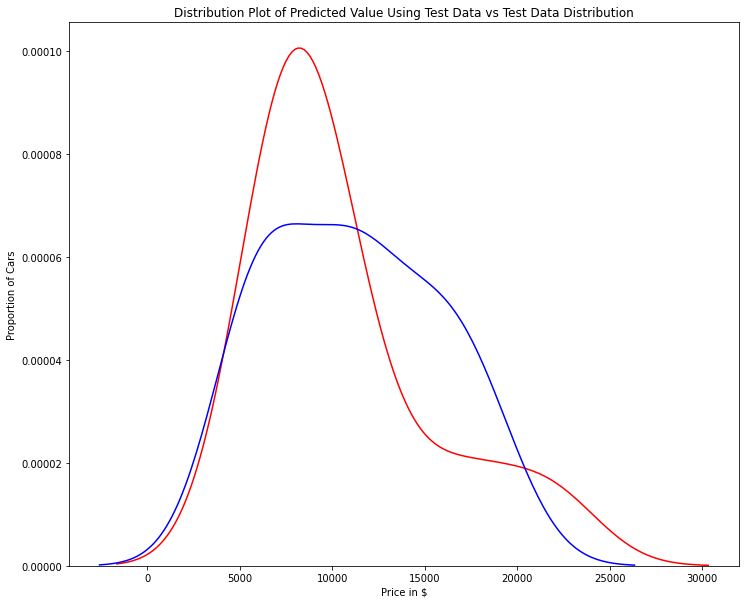

In [134]:
#   Distribution of predicted values of test data:

title = 'Distribution Plot of Predicted Value Using Test Data vs Test Data Distribution'
distribution_plot(y_test, y_hat_test, 'Actual Values (Test)', 'Predicted Values (Test)', title)

In [135]:
#   Poly:

from sklearn.preprocessing import PolynomialFeatures

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [60]:
#   Poly transformation of 'horsepower'

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [62]:
#   Create linear regression model 'poly':

poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [63]:
#   We can use the output of our model using method 'predict'. We assign the values to 'y_hat':

y_hat = poly.predict(x_test_pr)
y_hat[:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [64]:
#   Compare to actual targets:

print(y_hat[:4])
print(y_test[:4].values)

[ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
[ 6295. 10698. 13860. 13499.]


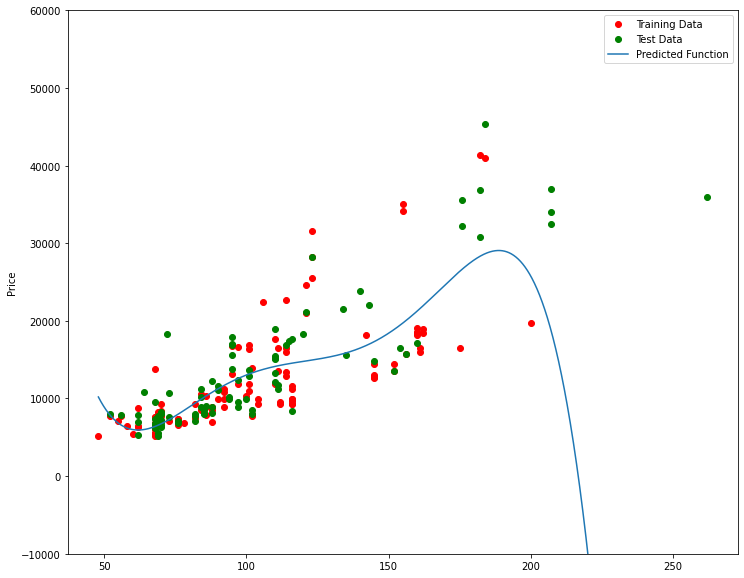

In [65]:
polly_plot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [66]:
poly.score(x_train_pr, y_train)

0.556771690212023

In [67]:
#   Overfitting
poly.score(x_test_pr, y_test)

-29.87134030204415

Text(3, 0.75, 'Maximum R^2')

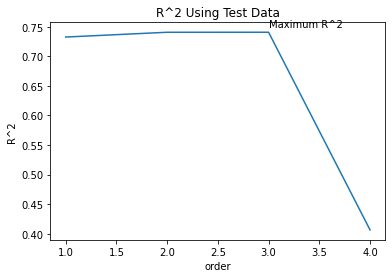

In [68]:
#   Check for different orders:

Rsqu_test = []
order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2')

In [71]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    polly_plot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [73]:
from ipywidgets import interact, interactive, fixed, interact_manual
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [74]:
pr1 = PolynomialFeatures(degree=2)

In [ ]:
pr1.fit_transform()

In [75]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [79]:
x_train_pr1.shape

(110, 15)

In [80]:
x_test_pr1.shape

(91, 15)

In [81]:
poly1 = LinearRegression()

In [82]:
poly1.fit(x_train_pr1, y_train)

LinearRegression()

In [94]:
y_hat1 = poly1.predict(x_test_pr1)

/Users/a19046897/PycharmProjects/Models study/venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/a19046897/PycharmProjects/Models study/venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


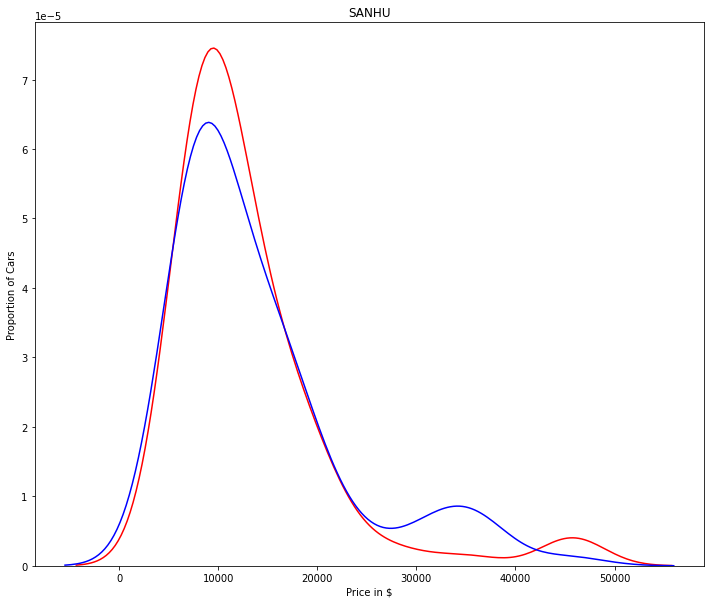

In [95]:
distribution_plot(y_hat1, y_test, 'SA', 'SI', 'SANHU')

In [96]:
#   Ridge regression. (Here test data will be validation data).

pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])

In [97]:
from sklearn.linear_model import Ridge

In [98]:
RidgeModel = Ridge(alpha=1)

In [101]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [102]:
yhat = RidgeModel.predict(x_test_pr)

In [103]:
print('Predicted: ', yhat[:4])
print('Test set: ', y_test[:4].values)

Predicted:  [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
Test set:  [ 6295. 10698. 13860. 13499.]


In [140]:
#   Choosing the best alpha:

from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0, 1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RidgeModel = Ridge(alpha=alpha)
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train score": train_score})

    Rsqu_train.append(train_score)
    Rsqu_test.append(test_score)

100%|██████████| 1000/1000 [00:03<00:00, 306.55it/s, Test Score=0.564, Train score=0.859]


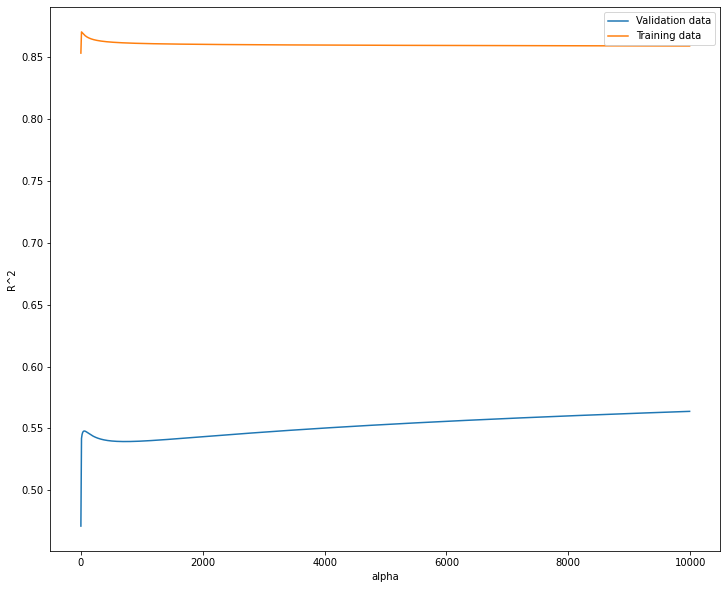

In [142]:
#   Print R^2 for different alphas:

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha, Rsqu_test, label="Validation data")
plt.plot(Alpha, Rsqu_train, label="Training data")
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()


In [144]:
RidgeModel2 = Ridge(alpha=10)
RidgeModel2.fit(x_train_pr, y_train)
RidgeModel2.score(x_test_pr, y_test)

0.5418576440206702

In [145]:
#   Grid search.
#   There is a class GridSearchCV for finding best hyperparameter.

from sklearn.model_selection import GridSearchCV

In [146]:
parameters1 = [{'alpha': [0.001, 0,1, 1, 10, 100, 1000, 10000, 100000]}]

In [147]:
RR = Ridge()
RR

Ridge()

In [150]:
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [151]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0, 1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [152]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [154]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

In [155]:
parameters2 = [{'alpha': [0.001, 0,1, 1, 10, 100, 1000, 10000, 100000], 'normalize': [True, False]}]

In [156]:
rr2 = Ridge()

In [157]:
Grid2 = GridSearchCV(rr2, parameters2, cv=4)

In [158]:
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0, 1, 1, 10, 100, 1000, 10000,
                                    100000],
                          'normalize': [True, False]}])

In [159]:
BestRR = Grid2.best_estimator_
BestRR

Ridge(alpha=1, normalize=True)

In [160]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.7688497506498385